In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import sklearn
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import LocalOutlierFactor

Steps:
1. Select features
2. Check for missing values
3. Check for outliers
4. Check for transform

## Import data

In [19]:
train = pd.read_csv('train.csv')
numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_train = train.select_dtypes(include=numeric_types) # Numeric features only
numeric_train.drop('Id', axis=1, inplace=True)
cat_train = train.select_dtypes(exclude=numeric_types) # Categorical features only
cat_train['SalePrice'] = train['SalePrice']

/Users/mdunford/opt/anaconda3/envs/mydashenv/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/mdunford/opt/anaconda3/envs/mydashenv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
numeric_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


## Select Numeric Features

<AxesSubplot:>

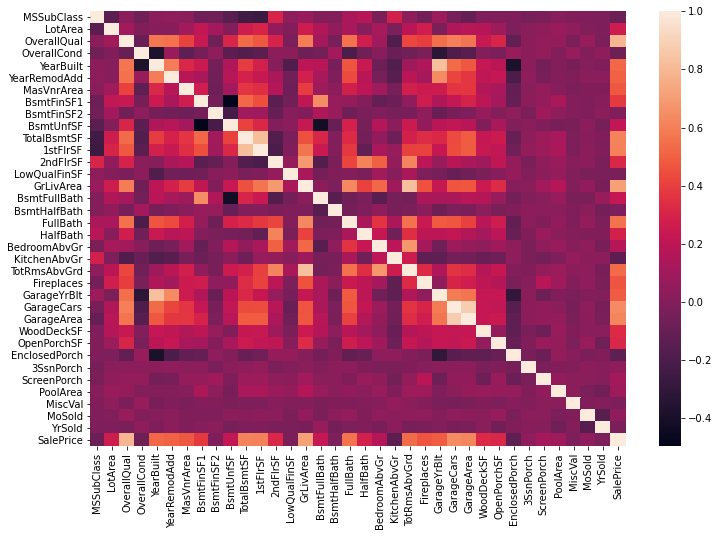

In [69]:
train_corr = numeric_train.corr()
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(train_corr)

<AxesSubplot:>

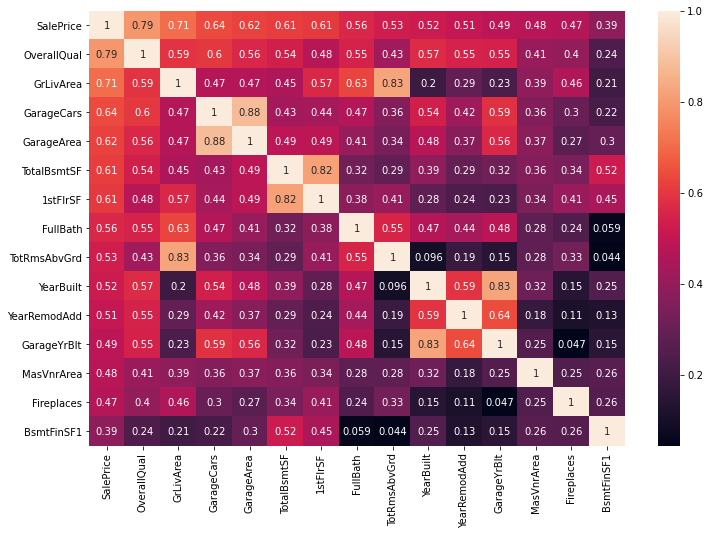

In [92]:
n = 15
f, ax = plt.subplots(figsize=(12,8))
cols = list(train_corr.nlargest(n, 'SalePrice').index)
sns.heatmap(train_corr.nlargest(n, 'SalePrice')[cols], annot=True)

## Missing values check

In [113]:
train.isna().sum().sort_values().tail(15)

BsmtCond          37
BsmtFinType1      37
BsmtFinType2      38
BsmtExposure      38
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
GarageCond        81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

## Outlier check

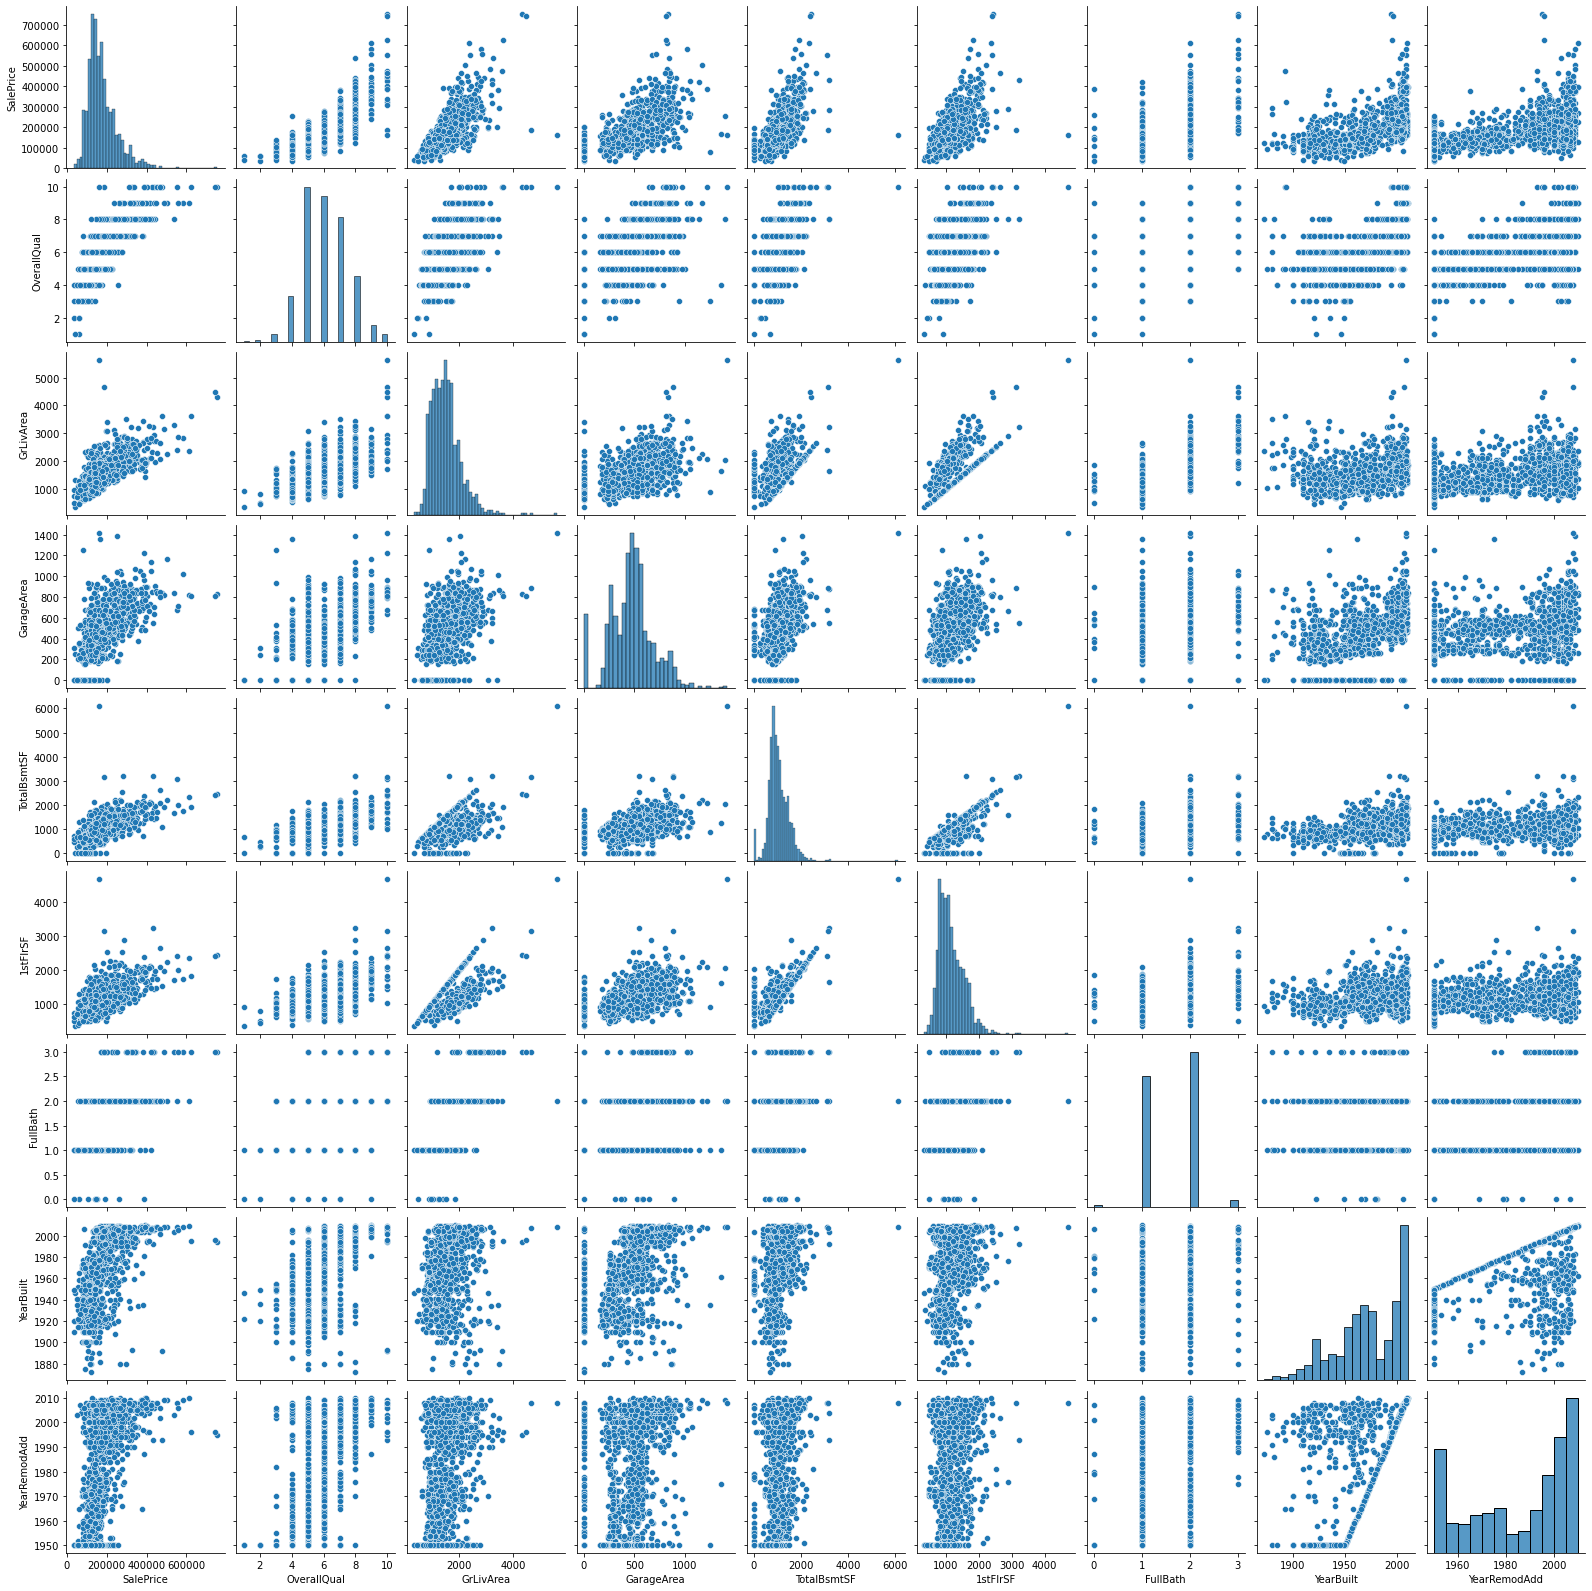

In [20]:
sns.pairplot(train[[
    'SalePrice','OverallQual','GrLivArea',
    'GarageArea','TotalBsmtSF','1stFlrSF',
    'FullBath','YearBuilt','YearRemodAdd'
]])

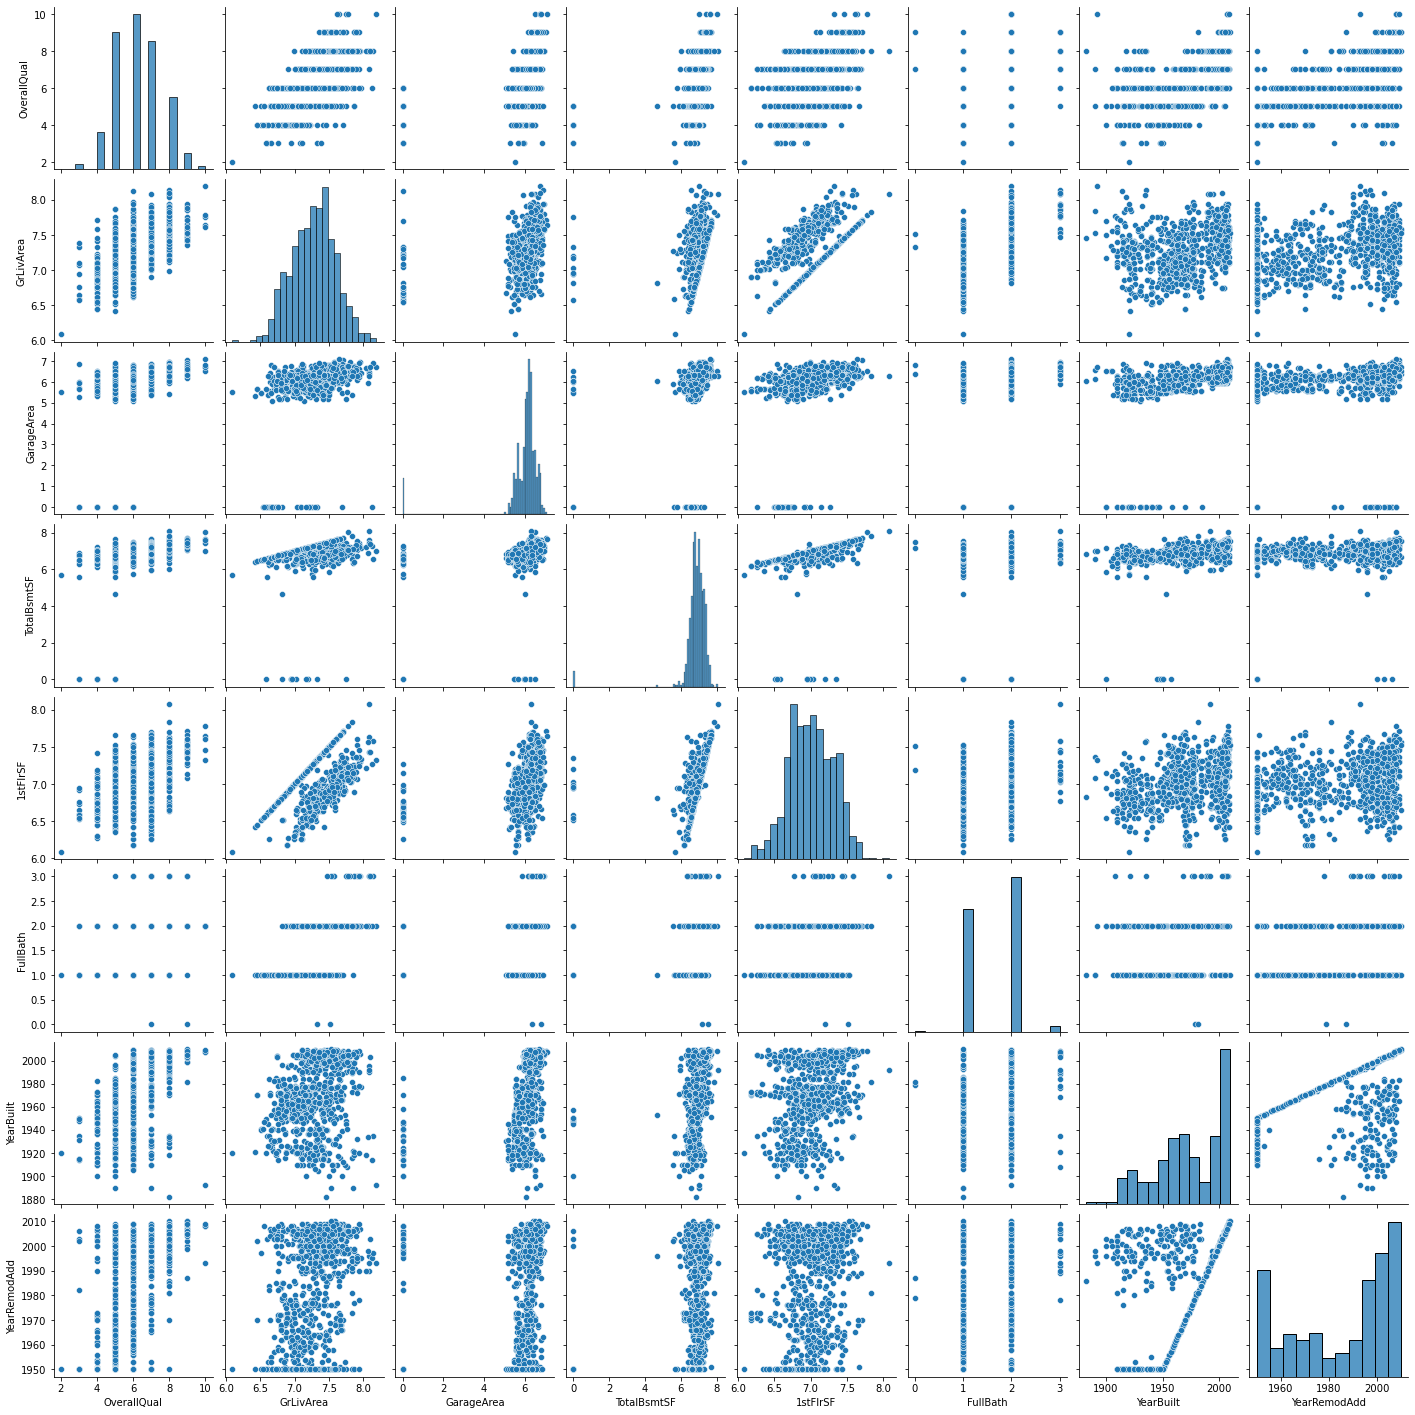

In [34]:
sns.pairplot(X_train)

## Transforms

/Users/mdunford/opt/anaconda3/envs/mydashenv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


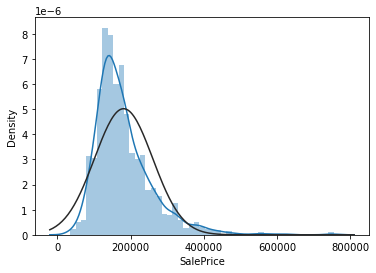

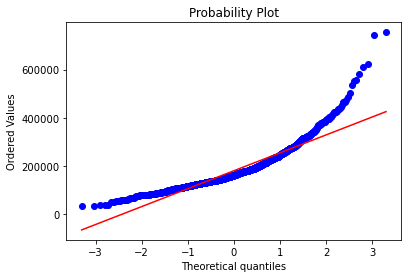

In [102]:
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

/Users/mdunford/opt/anaconda3/envs/mydashenv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


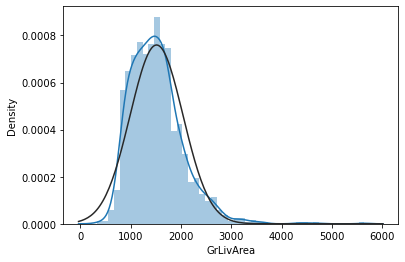

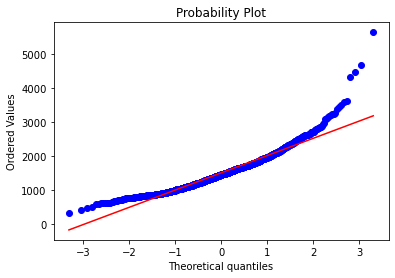

In [114]:
sns.distplot(train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

/Users/mdunford/opt/anaconda3/envs/mydashenv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


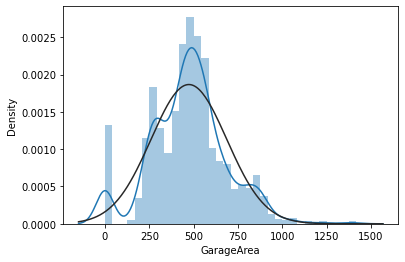

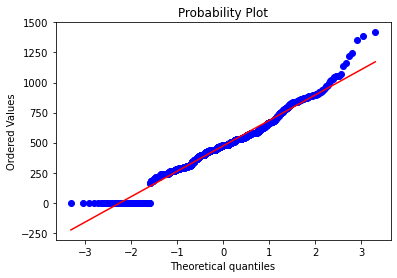

In [115]:
sns.distplot(train['GarageArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['GarageArea'], plot=plt)

/Users/mdunford/opt/anaconda3/envs/mydashenv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


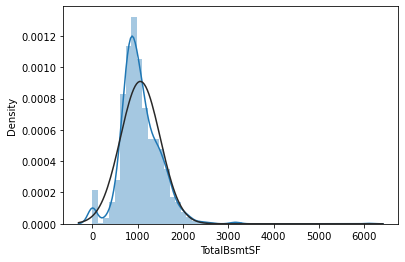

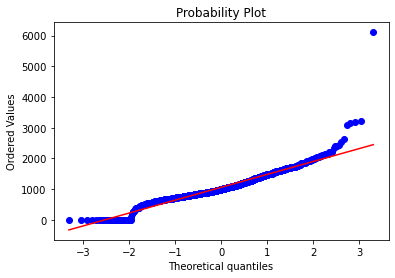

In [116]:
sns.distplot(train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

/Users/mdunford/opt/anaconda3/envs/mydashenv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


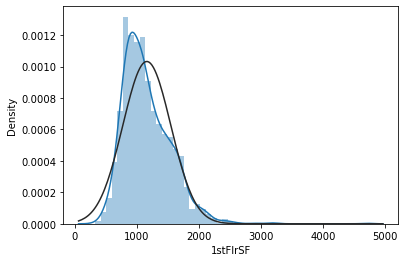

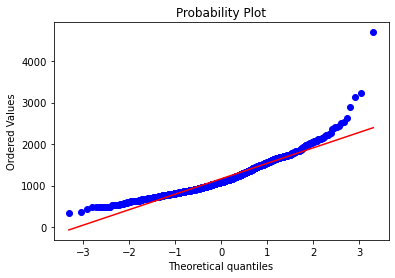

In [117]:
sns.distplot(train['1stFlrSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['1stFlrSF'], plot=plt)

/Users/mdunford/opt/anaconda3/envs/mydashenv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


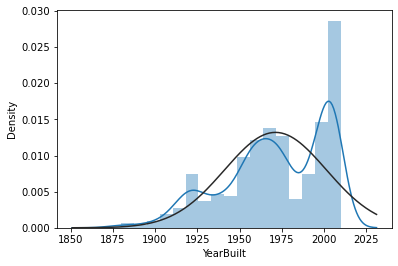

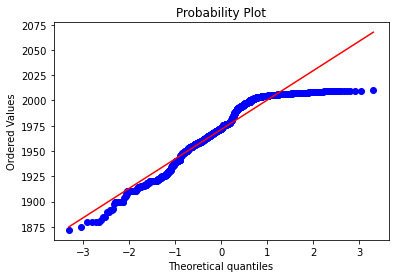

In [118]:
sns.distplot(train['YearBuilt'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['YearBuilt'], plot=plt)

/Users/mdunford/opt/anaconda3/envs/mydashenv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


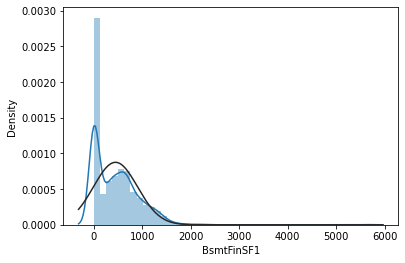

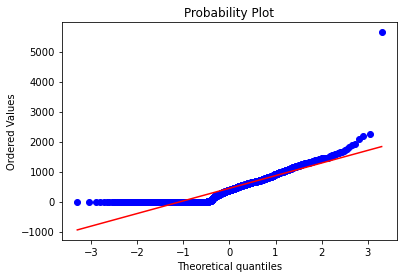

In [119]:
sns.distplot(train['BsmtFinSF1'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['BsmtFinSF1'], plot=plt)

## Prep training data

In [57]:
# Import training set
data = pd.read_csv('train.csv')

# Select columns
data = data[[
    'SalePrice','OverallQual','GrLivArea',
    'GarageArea','TotalBsmtSF','1stFlrSF',
    'FullBath','YearBuilt','YearRemodAdd'
]]

# Transforms
data['SalePrice'] = np.log(data['SalePrice'])
data['GrLivArea'] = np.log(data['GrLivArea'])
data['1stFlrSF'] = np.log(data['1stFlrSF'])
data['bsmt'] = 0
data.loc[data['TotalBsmtSF']>0,'bsmt'] = 1
data.loc[data['bsmt']==1,'TotalBsmtSF'] = np.log(data['TotalBsmtSF'])
data['garage'] = 0
data.loc[data['GarageArea']>0,'garage'] = 1
data.loc[data['garage']==1,'GarageArea'] = np.log(data['GarageArea'])
data.drop(['garage','bsmt'], axis=1, inplace=True)

# Train/test split
y = data['SalePrice']
X = data.drop('SalePrice', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Remove outliers
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train = X_train.loc[mask, :]
y_train = y_train[mask]

/Users/mdunford/opt/anaconda3/envs/mydashenv/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mdunford/opt/anaconda3/envs/mydashenv/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Gradient Boosting Regressor

In [58]:
# Without tuning
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
reg.predict(X_test)
reg.score(X_test, y_test)

0.8392889537170096

In [71]:
# With hyperparameter tuning
reg = GradientBoostingRegressor()

param_grid={
    'n_estimators': np.arange(100,210,10),
    'min_samples_split': np.arange(2,11,1),
    'min_samples_leaf': np.arange(2,11,1)
}

gsearch = GridSearchCV(
    estimator=reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5
)

gsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200])},
             scoring='neg_mean_squared_error')

In [73]:
gsearch.best_params_, gsearch.best_score_

({'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 100},
 -0.021570223224042635)

In [74]:
reg = GradientBoostingRegressor(
    random_state=0,
    min_samples_leaf=10,
    min_samples_split=8,
    n_estimators=100
)
reg.fit(X_train, y_train)
reg.predict(X_test)
reg.score(X_test, y_test)

0.8493640335723464

## Import test data

In [85]:
test = pd.read_csv('test.csv')

test_ids = test['Id']

# Select the columns
test = test[[
    'OverallQual','GrLivArea',
    'GarageArea','TotalBsmtSF','1stFlrSF',
    'FullBath','YearBuilt','YearRemodAdd'
]]

# Apply transformations
test['GrLivArea'] = np.log(test['GrLivArea'])
test['1stFlrSF'] = np.log(test['1stFlrSF'])
test['bsmt'] = 0
test.loc[test['TotalBsmtSF']>0,'bsmt'] = 1
test.loc[test['bsmt']==1,'TotalBsmtSF'] = np.log(test['TotalBsmtSF'])
test['garage'] = 0
test.loc[test['GarageArea']>0,'garage'] = 1
test.loc[test['garage']==1,'GarageArea'] = np.log(test['GarageArea'])
test.drop(['garage','bsmt'], axis=1, inplace=True)

# Impute missing values
test.fillna(test.mean(), inplace=True)

test.head()

/Users/mdunford/opt/anaconda3/envs/mydashenv/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mdunford/opt/anaconda3/envs/mydashenv/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd
0,5,6.797940,6.593045,6.782192,6.797940,1,1961,1961
1,6,7.192182,5.743003,7.192182,7.192182,1,1958,1958
2,5,7.395722,6.177944,6.833032,6.833032,2,1997,1998
3,6,7.380256,6.152733,6.830874,6.830874,2,1998,1998
4,8,7.154615,6.226537,7.154615,7.154615,2,1992,1992


## Make predictions

In [89]:
predictions = reg.predict(test)
predictions = np.exp(predictions)
predictions = pd.DataFrame(predictions)
predictions['Id'] = test_ids
predictions = predictions[['Id',0]]
predictions.columns = ['Id','SalePrice']
predictions.head()

,Id,SalePrice
0,1461,128545.332775
1,1462,150850.935108
2,1463,170277.212060
3,1464,179210.147043
4,1465,201125.514596


In [90]:
predictions.to_csv('house_price_regression_submission.csv', index=False)